In [ ]:
%pip install pandas numpy matplotlib seaborn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataframe = pd.read_csv("vendas_roupas_masculinas.csv")

dataframe.head(n=10)

,Marca,Categoria,Tamanho,Cidade,Preço (R$),Quantidade Vendida
0,Richards,Camisa,M,Curitiba,98.35,6
1,Richards,Calça,M,São Paulo,171.49,6
2,Aviator,Calça,P,Curitiba,221.85,2
3,Aviator,Jaqueta,P,Belo Horizonte,277.60,19
4,Aviator,Camisa,G,Porto Alegre,95.94,12
5,Aramis,Jaqueta,M,Porto Alegre,262.86,12
6,Aramis,Jaqueta,G,Belo Horizonte,488.04,14
7,Richards,Bermuda,G,São Paulo,84.92,11
8,Lacoste,Camiseta,P,Porto Alegre,132.08,10
9,Aramis,Bermuda,M,Curitiba,181.77,17


In [4]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Marca               100 non-null    object 
 1   Categoria           100 non-null    object 
 2   Tamanho             100 non-null    object 
 3   Cidade              100 non-null    object 
 4   Preço (R$)          100 non-null    float64
 5   Quantidade Vendida  100 non-null    int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


In [5]:
dataframe.isnull().sum()

Marca                 0
Categoria             0
Tamanho               0
Cidade                0
Preço (R$)            0
Quantidade Vendida    0
dtype: int64

In [6]:
dataframe['Preço Total'] = dataframe['Preço (R$)'] * dataframe['Quantidade Vendida']

dataframe.head(n=10)

,Marca,Categoria,Tamanho,Cidade,Preço (R$),Quantidade Vendida,Preço Total
0,Richards,Camisa,M,Curitiba,98.35,6,590.10
1,Richards,Calça,M,São Paulo,171.49,6,1028.94
2,Aviator,Calça,P,Curitiba,221.85,2,443.70
3,Aviator,Jaqueta,P,Belo Horizonte,277.60,19,5274.40
4,Aviator,Camisa,G,Porto Alegre,95.94,12,1151.28
5,Aramis,Jaqueta,M,Porto Alegre,262.86,12,3154.32
6,Aramis,Jaqueta,G,Belo Horizonte,488.04,14,6832.56
7,Richards,Bermuda,G,São Paulo,84.92,11,934.12
8,Lacoste,Camiseta,P,Porto Alegre,132.08,10,1320.80
9,Aramis,Bermuda,M,Curitiba,181.77,17,3090.09


In [7]:
rank_marcas = (
  dataframe.groupby('Marca')['Preço Total']
  .sum()
  .reset_index()
  .sort_values(by='Preço Total', ascending=False)
)
rank_marcas

,Marca,Preço Total
0,Aramis,66391.83
4,Richards,61772.24
1,Aviator,40072.41
3,Polo Halp Lorem,31966.05
2,Lacoste,30614.11


In [8]:
media_preco_por_categoria = (
  dataframe.groupby('Categoria')['Preço (R$)']
  .mean()
  .reset_index()
  .sort_values(by='Preço (R$)', ascending=False)
)

media_preco_por_categoria

,Categoria,Preço (R$)
4,Jaqueta,365.119091
1,Calça,215.559130
2,Camisa,189.312778
0,Bermuda,134.087143
3,Camiseta,109.636875


In [9]:
tamanho_mais_vendido = dataframe['Tamanho'].mode()

print("O tamanho mais vendido é: ", tamanho_mais_vendido[0])

O tamanho mais vendido é:  G


In [10]:
mediana_preco_por_categoria = (
  dataframe.groupby('Categoria')['Preço (R$)']
  .median()
  .reset_index()
  .sort_values('Preço (R$)', ascending=False)
)

mediana_preco_por_categoria

,Categoria,Preço (R$)
4,Jaqueta,369.700
1,Calça,221.850
2,Camisa,192.275
0,Bermuda,139.740
3,Camiseta,113.015


In [11]:
media_pecas_vendidas = (
    dataframe.groupby('Marca')['Quantidade Vendida']
    .mean()
    .round(2)
    .reset_index()
    .sort_values('Quantidade Vendida', ascending=False)
)


media_pecas_vendidas

,Marca,Quantidade Vendida
4,Richards,13.25
0,Aramis,12.12
3,Polo Halp Lorem,9.76
1,Aviator,9.75
2,Lacoste,8.95


In [12]:
desvios_padrao_pecas_vendidas = (
    dataframe.groupby('Marca')['Quantidade Vendida']
    .std()
    .round(2)
    .reset_index()
    .sort_values('Quantidade Vendida', ascending=False)
)


desvios_padrao_pecas_vendidas

,Marca,Quantidade Vendida
1,Aviator,6.46
2,Lacoste,5.87
0,Aramis,5.64
4,Richards,5.29
3,Polo Halp Lorem,5.18


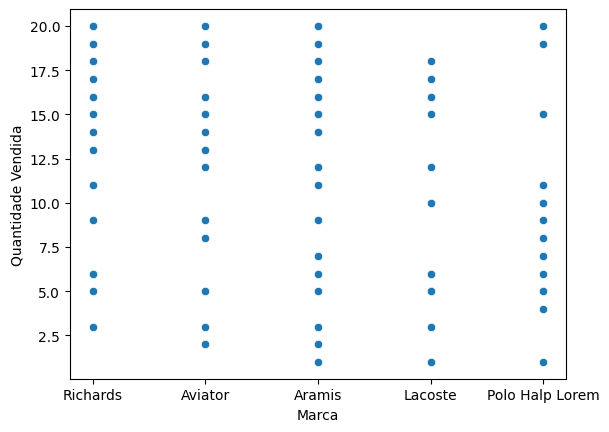

In [13]:
sns.scatterplot(
  data=dataframe,
  y='Quantidade Vendida',
  x='Marca'
  )

plt.show()

In [14]:
dataframe.describe().T

,count,mean,std,min,25%,50%,75%,max
Preço (R$),100.0,209.6813,106.020224,54.12,136.2125,185.940,260.3775,488.04
Quantidade Vendida,100.0,10.8700,5.835549,1.00,5.0000,11.000,16.0000,20.00
Preço Total,100.0,2308.1664,1840.281198,107.54,917.1300,1672.875,3286.8000,7808.78


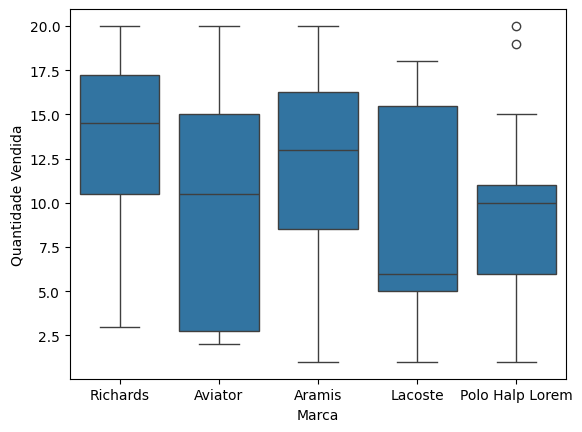

In [15]:
sns.boxplot(
  data=dataframe,
  y='Quantidade Vendida',
  x='Marca'
  )

plt.show()

In [16]:
amplitude_total = dataframe['Preço (R$)'].max() - dataframe['Preço (R$)'].min()

print('Amplitude total do preços é: ', amplitude_total)

Amplitude total do preços é:  433.92


In [17]:
variancia = dataframe['Preço (R$)'].var()
media = dataframe['Preço (R$)'].mean()


print('Variância do preços é: ', variancia, 'e a média é: ', media)

Variância do preços é:  11240.28791041414 e a média é:  209.68129999999996


In [18]:
dataframe.head()

,Marca,Categoria,Tamanho,Cidade,Preço (R$),Quantidade Vendida,Preço Total
0,Richards,Camisa,M,Curitiba,98.35,6,590.10
1,Richards,Calça,M,São Paulo,171.49,6,1028.94
2,Aviator,Calça,P,Curitiba,221.85,2,443.70
3,Aviator,Jaqueta,P,Belo Horizonte,277.60,19,5274.40
4,Aviator,Camisa,G,Porto Alegre,95.94,12,1151.28


In [19]:
desvio_padrao_preço = np.std(dataframe['Preço (R$)'], ddof = 1)

tam_amostra = len(dataframe['Preço (R$)'])

erro_padrao_media = desvio_padrao_preço / np.sqrt(tam_amostra)

erro_padrao_media

np.float64(10.602022406321419)

In [25]:
dataframe.head(n = 20)

,Marca,Categoria,Tamanho,Cidade,Preço (R$),Quantidade Vendida,Preço Total
0,Richards,Camisa,M,Curitiba,98.35,6,590.10
1,Richards,Calça,M,São Paulo,171.49,6,1028.94
2,Aviator,Calça,P,Curitiba,221.85,2,443.70
3,Aviator,Jaqueta,P,Belo Horizonte,277.60,19,5274.40
4,Aviator,Camisa,G,Porto Alegre,95.94,12,1151.28
5,Aramis,Jaqueta,M,Porto Alegre,262.86,12,3154.32
6,Aramis,Jaqueta,G,Belo Horizonte,488.04,14,6832.56
7,Richards,Bermuda,G,São Paulo,84.92,11,934.12
8,Lacoste,Camiseta,P,Porto Alegre,132.08,10,1320.80
9,Aramis,Bermuda,M,Curitiba,181.77,17,3090.09


In [24]:
std_qnt_vendidas = dataframe['Quantidade Vendida'].std()
mean_qnt_vendidas = dataframe['Quantidade Vendida'].mean()

coeficiente_variacao = (std_qnt_vendidas / mean_qnt_vendidas) * 100

print("O coeficiente de variação é: ", coeficiente_variacao, "%")

O coeficiente de variação é:  53.68490673988303 %
